In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [3]:
dataset = pd.read_csv('Business_Profits.csv')

In [4]:
dataset.columns

Index(['Workforce', 'Technology ', 'R&D', 'Advt', 'real estate', 'Profits'], dtype='object')

In [5]:
dataset.isna().sum()

Workforce      0
Technology     0
R&D            0
Advt           0
real estate    0
Profits        0
dtype: int64

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Workforce    99 non-null     int64
 1   Technology   99 non-null     int64
 2   R&D          99 non-null     int64
 3   Advt         99 non-null     int64
 4   real estate  99 non-null     int64
 5   Profits      99 non-null     int64
dtypes: int64(6)
memory usage: 4.8 KB


In [6]:
dataset.describe()

,Workforce,Technology,R&D,Advt,real estate,Profits
count,99.000000,9.900000e+01,99.000000,9.900000e+01,9.900000e+01,9.900000e+01
mean,2884.161616,9.729974e+06,149682.444444,9.729974e+06,9.729974e+06,9.882540e+06
std,1194.147982,7.231682e+06,95257.914958,7.231682e+06,7.231682e+06,7.287412e+06
min,1002.000000,1.004004e+06,16820.000000,1.004004e+06,1.004004e+06,1.072140e+06
25%,1860.000000,3.461536e+06,78606.000000,3.461536e+06,3.461536e+06,3.565844e+06
50%,2705.000000,7.317025e+06,132182.000000,7.317025e+06,7.317025e+06,7.447000e+06
75%,3815.500000,1.455838e+07,200988.500000,1.455838e+07,1.455838e+07,1.483535e+07
max,4954.000000,2.454212e+07,418770.000000,2.454212e+07,2.454212e+07,2.489385e+07


             Workforce  Technology        R&D      Advt  real estate   Profits
Workforce     1.000000     0.984503  0.588900  0.984503     0.984503  0.984835
Technology    0.984503     1.000000  0.568276  1.000000     1.000000  0.999942
R&D           0.588900     0.568276  1.000000  0.568276     0.568276  0.577098
Advt          0.984503     1.000000  0.568276  1.000000     1.000000  0.999942
real estate   0.984503     1.000000  0.568276  1.000000     1.000000  0.999942
Profits       0.984835     0.999942  0.577098  0.999942     0.999942  1.000000


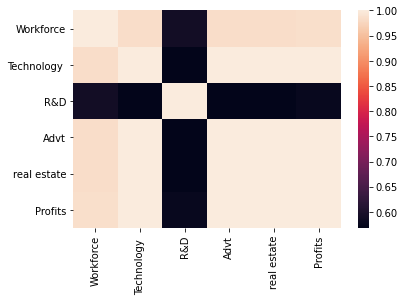

In [27]:
corr = dataset.corr()
sns.heatmap(corr)
print(corr)
plt.show()

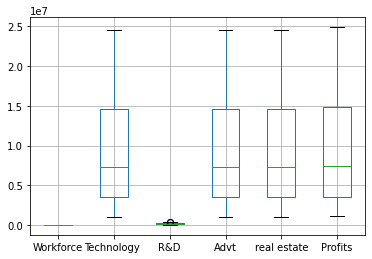

In [28]:
dataset.boxplot()
plt.show()

In [7]:
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,-1].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [11]:
polynomial_feature = PolynomialFeatures(degree = 2)
X_poly = polynomial_feature.fit_transform(x)
polynomial_regressor = LinearRegression()
regressor = polynomial_regressor.fit(X_poly, y)

In [13]:
polynomial_feature = PolynomialFeatures(degree = 2)
X_poly = polynomial_feature.fit_transform(x_test)
y_pred = regressor.predict(X_poly)

In [14]:
print(y_test)

[12655750  2100180 13960502  4717143  5241780  1408596  7447000  5517720
 15229044 13644907  2255163  7283376 21067844  1136162  2725512  2028498
 20321943  1231878 15514496  9442429]


In [15]:
print(y_pred)

[12655750.00513046  2100180.0056421  13960502.00377672  4717143.00135267
  5241780.00199174  1408596.01104948  7447000.003376    5517720.00208469
 15229044.00242799 13644907.00417261  2255163.00485471  7283376.00268643
 21067843.98678844  1136162.01452422  2725512.00330918  2028498.00609196
 20321942.98943346  1231878.01319351 15514496.00164073  9442429.00453728]


In [16]:
error = y_test - y_pred
print(error)

[-0.00513046 -0.0056421  -0.00377672 -0.00135267 -0.00199174 -0.01104948
 -0.003376   -0.00208469 -0.00242799 -0.00417261 -0.00485471 -0.00268643
  0.01321156 -0.01452422 -0.00330918 -0.00609196  0.01056654 -0.01319351
 -0.00164073 -0.00453728]


In [17]:
print(error.reshape(20,1))

[[-0.00513046]
 [-0.0056421 ]
 [-0.00377672]
 [-0.00135267]
 [-0.00199174]
 [-0.01104948]
 [-0.003376  ]
 [-0.00208469]
 [-0.00242799]
 [-0.00417261]
 [-0.00485471]
 [-0.00268643]
 [ 0.01321156]
 [-0.01452422]
 [-0.00330918]
 [-0.00609196]
 [ 0.01056654]
 [-0.01319351]
 [-0.00164073]
 [-0.00453728]]


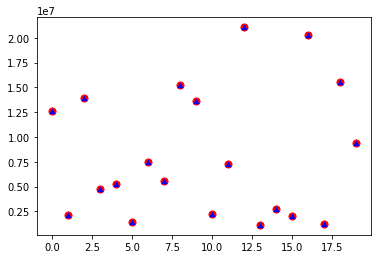

In [18]:
plt.scatter(range(20), y_test, color='red', s=50)
plt.scatter(range(20), y_pred, color='blue', marker = '^', s = 20)
plt.show()

In [19]:
print(regressor.coef_, regressor.intercept_)

[ 0.00000000e+00  9.99908115e-01  3.33333378e-01  9.99999982e-01
  3.33333330e-01  3.33333330e-01 -6.16985831e-11  8.38259248e-12
  5.64590117e-11  9.77690061e-06  2.03355451e-08 -3.94462906e-06
 -1.54865270e-14 -2.03355459e-08 -5.83227155e-06] 0.07589357160031796
